In [1]:
import graphlab

In [2]:
sales = graphlab.SFrame.read_csv('Philadelphia_Crime_Rate_noNA.csv')

[INFO] 1450468443 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to /home/him/anaconda2/envs/dato-env/lib/python2.7/site-packages/certifi/cacert.pem
1450468443 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This non-commercial license of GraphLab Create is assigned to hmishra2250@gmail.com and will expire on December 02, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-15645 - Server binary: /home/him/anaconda2/envs/dato-env/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1450468443.log
[INFO] GraphLab Server Version: 1.7.1


PROGRESS: Finished parsing file /home/him/AllProjects/ML_Specialization/MLRegression/Week-1/Philadelphia_Crime_Rate_noNA.csv
PROGRESS: Parsing completed. Parsed 99 lines in 0.102375 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file /home/him/AllProjects/ML_Specialization/MLRegression/Week-1/Philadelphia_Crime_Rate_noNA.csv
PROGRESS: Parsing completed. Parsed 99 lines in 0.019029 secs.


In [3]:
sales

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


In [4]:
graphlab.canvas.set_target('ipynb')
sales.show(view='Scatter Plot',x='CrimeRate', y='HousePrice')

In [5]:
crime_model = graphlab.linear_regression.create(sales,target = 'HousePrice', features=['CrimeRate'],validation_set=None , verbose=False)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

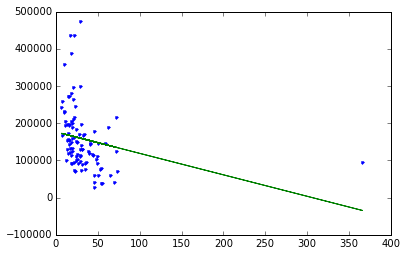

In [8]:
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',
        sales['CrimeRate'],crime_model.predict(sales),'-')

In [9]:
sales_nocc = sales[sales['MilesPhila']!=0]

In [10]:
len(sales_nocc)

98

In [11]:
len(sales)

99

In [12]:
sales_nocc.show(view='Scatter Plot', x= 'CrimeRate',y='HousePrice')

In [13]:
crime_model_nocc = graphlab.linear_regression.create(sales_nocc,target = 'HousePrice',features=['CrimeRate'],validation_set=None,verbose=False)

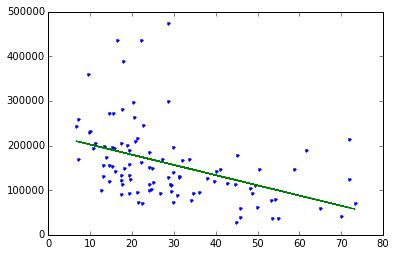

In [14]:
plt.plot(sales_nocc['CrimeRate'],sales_nocc['HousePrice'],'.',
        sales_nocc['CrimeRate'],crime_model_nocc.predict(sales_nocc),'-')

In [15]:
crime_model.get('coefficients')

name,index,value
(intercept),None,176626.046881
CrimeRate,None,-576.804949058


In [16]:
crime_model_nocc.get('coefficients')

name,index,value
(intercept),None,225204.604303
CrimeRate,None,-2287.69717443


# Remove high valued outlire  neighbourhood and redo our analysis

In [21]:
sales_no_high = sales_nocc[sales_nocc['HousePrice']<350000]
crime_model_nohigh = graphlab.linear_regression.create(sales_no_high,target = 'HousePrice',features=['CrimeRate'],validation_set=None,verbose=False)

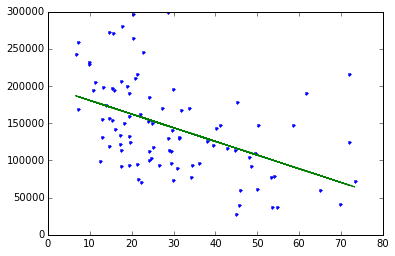

In [22]:
plt.plot(sales_no_high['CrimeRate'],sales_no_high['HousePrice'],'.',
        sales_no_high['CrimeRate'],crime_model_nohigh.predict(sales_no_high),'-')

In [23]:
crime_model_nohigh.get('coefficients')

name,index,value
(intercept),None,199073.589615
CrimeRate,None,-1837.71280989


In [24]:
crime_model_nocc.get('coefficients')

name,index,value
(intercept),None,225204.604303
CrimeRate,None,-2287.69717443
